# CLASSIFICATION DES IMAGES  MNIST

## 1. Téléchargement du jeu de données MNIST

Les bibliothèques Python populaires telles que TensorFlow ou Keras offrent la possibilité de télécharger les données directement via une fonction intégrée.

### 1.1 Explication des données

Le jeu de données MNIST est un ensemble de données standard pour l'entraînement et la validation des modèles de machine learning, particulièrement dans le domaine de la reconnaissance d'images. Il est composé de 60 000 images pour l'entraînement et de 10 000 images pour le test, représentant des chiffres manuscrits de 0 à 9. Chaque image est en niveaux de gris avec une résolution de 28x28 pixels.

In [1]:
import tensorflow as tf

# Téléchargement des données MNIST
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

# Vérification des dimensions des jeux de données
print(f"Dimensions des images d'entraînement : {x_train.shape}")
print(f"Dimensions des étiquettes d'entraînement : {y_train.shape}")
print(f"Dimensions des images du test : {x_test.shape}")
print(f"Dimensions des étiquettes du test : {y_test.shape}")

Dimensions des images d'entraînement : (60000, 28, 28)
Dimensions des étiquettes d'entraînement : (60000,)
Dimensions des images du test : (10000, 28, 28)
Dimensions des étiquettes du test : (10000,)


### 1.2 Visualisation des images de la base de données MNIST

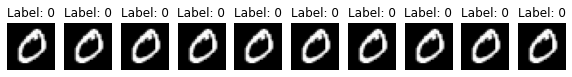

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Nommbres d'images qui seront afficher  
nb_images = 10

# Sélection des premières images du jeu de données d'entraînement
images = x_train[:nb_images]
labels = y_train[:nb_images]

# Créeation d'une figure pour afficher les images
plt.figure(figsize=(10, 4))

for i in range(nb_images):
    plt.subplot(1, nb_images, i+1) 
    plt.imshow(images[1].reshape(28,28), cmap ='gray') # Redimensionnement de l'image pour l'affichage
    plt.title(f"Label: {np.argmax(labels[i])}") # Affichage de l'étiquette
    plt.axis('off') # suppression des axes
# Affichage toutes les images
plt.show()    

## 2. Préparation des données

La prochaine étape consiste à préparer ces données pour l'entraînement du modèle de classification. Cette préparation inclut la conversion des données brutes en un format utilisable (comme des tableaux NumPy  d'images et de labels), la normalisation des images et la division des données en ensembles d'entraînement et de test.

In [3]:
from tensorflow.keras.utils import to_categorical

# Redimensionnement des images avec ajout d'une dimension suplémentaire pour les canaux
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalisation des pixels (de 0-255 à 0-1)
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') /255.0

# Encodage des étiquettes en one-hot (pour que chaque classe ait sa propre dimension)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Verification des dimensions des données après prétraitement
print(f"Nouvelle dimension des images d'entrainement : {x_train.shape}")
print(f"Nouvelle dimension des étiquettes d'entrainement : {y_train.shape}")
print(f"Nouvelle dimension des images du test : {x_test.shape}")
print(f"Nouvelle dimension des images du test : {y_test.shape}")

Nouvelle dimension des images d'entrainement : (60000, 28, 28, 1)
Nouvelle dimension des étiquettes d'entrainement : (60000, 10)
Nouvelle dimension des images du test : (10000, 28, 28, 1)
Nouvelle dimension des images du test : (10000, 10)


**Remarques**:

**(1) Normalisation des données** : Les valeurs des pixels, qui vont de 0 à 255, sont ramenées à une échelle de 0 à 1. Cela améliore la convergence du modèle.

**(2) Encodage des étiquettes** : Les étiquettes des chiffres (0-9) sont converties en encodage one-hot pour les utiliser avec des réseaux de neurones, surtout pour les problèmes de classification.

## 3. Modèle de Deep Learning capable de classer les images du jeu de données MNIST 

In [4]:
# Définition de la dimension des images
image_rows = 28
image_cols = 28
image_shape = (image_rows, image_cols,1)
print(image_shape)


(28, 28, 1)


**N.B**:
Pour la Classification des images (chiffres) MNIST puisque les images sont en niveaux de gris, c'est pourquoi l'input_shape pour le réseau est défini comme (28, 28, 28), on le définie ainsi comme (28, 28, 1) avec 1 qui représente la coileur grise. 

### 3.1 Définition du modèle dedeep learning

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Définition du modèle CNN
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size= 3, activation='relu', input_shape = image_shape),
    MaxPooling2D(pool_size=2), # Réduction des dimensions des images (28x28 -> 14x14)
    Dropout(0.2), # Dropout pour éviter le surapprentissage
    Flatten(), # Conversion des couches en un vecteur 1D
    Dense(32, activation = 'relu'), # Couche dense avec 32 neurones
    Dense(10, activation = 'softmax') # Sortie avec 10 classes (0-9), softmax pour la classification
])


In [6]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

**Explication du réseau de neurone**:

- Une première couche de convolution (32 filtres, taille de noyau 3x3) pour extraire les caractéristiques des images.Après convolution, l'image devient de dimension 26x26 avec 32 filtres ou canaux.
- MaxPooling2D pour réduire les dimensions des images (26x26 → 13x13).
- Dropout pour prévenir le surapprentissage en désactivant aléatoirement 20% des neurones durant l'entraînement.
- Flatten pour aplatir les données 2D en un vecteur 1D avant de les passer aux couches denses.
- Une première couche dense avec 32 neurones pour l'apprentissage des caractéristiques abstraites.
- Une couche dense finale avec 10 neurones pour la classification des chiffres (0-9) avec la fonction d'activation softmax.

### 3.2 Entrainement du modèle

In [7]:
# Compilation du modèle
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 44s 22ms/step - loss: 0.2033 - accuracy: 0.9398 - val_loss: 0.0789 - val_accuracy: 0.9752
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0799 - accuracy: 0.9756 - val_loss: 0.0628 - val_accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0603 - accuracy: 0.9815 - val_loss: 0.0612 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0486 - accuracy: 0.9845 - val_loss: 0.0513 - val_accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0635 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.0458 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0469 -

**Compilation** :
- L'optimiseur Adam est utilisé pour la descente de gradient.
- La fonction de perte est categorical_crossentropy, adaptée à la classification multi-classes.
- L'évaluation se fait sur la base de la précision.

**Entraînement** :  10 époques sont utilisées et une taille de batch de 32 pour l'entraînement.
Les performances sur les données de test sont mesurées après chaque époque avec validation_data.

###  3.3 Training Accuracy vs Validation Accuracy, et Training Loss vs Validation Loss

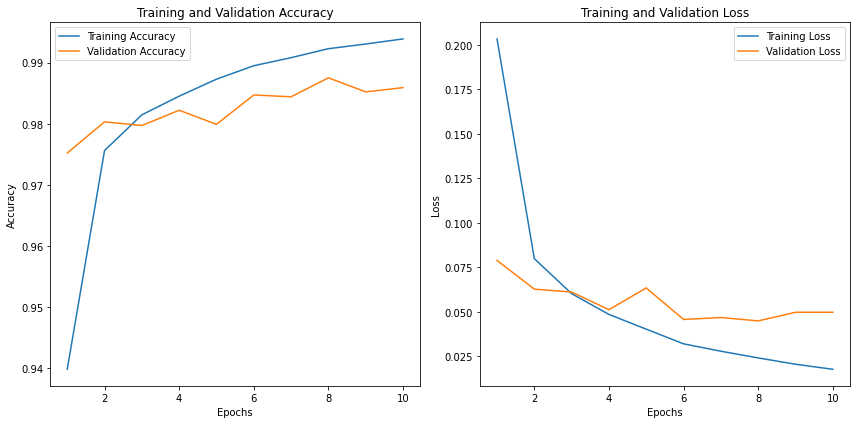

In [8]:
# Récupération des données d'historique de l'entraînement
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(accuracy) + 1)

# Création des graphiques
plt.figure(figsize=(12, 6))

# Graphique de la précision
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Graphique de la perte
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Interprétation** : 
- Graphique de la précision 

Le modèle généralise bien au départ, mais la précision sur les données de validation semble stagner, voire baisser légèrement. Cela pourrait indiquer que le modèle commence à surapprendre (overfitting) après un certain nombre d'époques.
- Graphique de la perte

La diminution initiale de la perte de validation montre que le modèle apprend bien au début. Cependant, l'augmentation légère vers la fin indique que le modèle commence à surajuster (overfitting) les données d'entraînement, ce qui signifie qu'il devient moins performant sur les nouvelles données (validation) à cause de sa complexité.

## 4. Evaluation du modèle 

In [9]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.0498
Test Accuracy : 0.9859


In [10]:
from sklearn.metrics import classification_report

# Faire des prédictions sur le jeu de test
y_pred = cnn_model.predict(x_test)

# Convertion des prédictions et les étiquettes de test du format one-hot à des entiers
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Générer le rapport de classification
report = classification_report(y_test_classes, y_pred_classes, target_names=[str(i) for i in range(10)])

# Affichage du rapport de classification
print("Rapport de classification :\n", report)

313/313 [==============================] - 2s 6ms/step
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## 5. Analyse des résultats du modèle 

**Analyse des résultats du modèle**: 
Ce modèle CNN présente une excellente performance avec :

- Une précision de 98% sur le jeu de test, ce qui montre qu'il généralise très bien.
- Une précision et un rappel élevés pour chaque classe, ce qui signifie que le modèle fait peu d'erreurs de prédiction et est capable de capturer la majorité des exemples de chaque chiffre manuscrit.

**Forces du modèle** :
1. **Précision élevée** : Le modèle atteint une précision de 98,66 % sur le jeu de test, ce qui est très bon pour une tâche de classification d'images de chiffres manuscrits. 
2. **Bonne convergence du modèle** : Sur les graphiques "Training Accuracy vs Validation Accuracy" et "Training Loss vs Validation Loss", on peut observer que l'accuracy (précision) continue d'augmenter au fil des époques pour les ensembles d'entraînement et de validation. De même, la perte diminue progressivement pour les deux ensembles. 
3. **Architecture simple** : Le modèle utilise une architecture CNN relativement simple, avec seulement une couche de convolution, une couche de pooling, et une couche dense. Cette simplicité permet au modèle d'apprendre efficacement tout en évitant le surapprentissage dans une certaine mesure grâce au dropout (20 %). La simplicité de l'architecture permet également de garder un temps d'entraînement raisonnable.

**Faiblesses du modèle** :
1. **Le surapprentissage** : Bien que la précision sur le jeu de validation soit proche de celle sur le jeu d'entraînement, il existe un léger écart. Cela pourrait être un signe de léger surapprentissage (overfitting).
2. **Classes sous-performantes** : Dans le rapport de classification, bien que les métriques soient globalement excellentes, certaines classes comme le chiffre 9 semblent avoir un score de rappel légèrement plus faible (0,97), ce qui indique que le modèle peut confondre certains échantillons de cette classe avec d'autres chiffres. 

## 6. Suggestions d'ammélioration de la classification

### 6.1  Architectures plus profondes

In [11]:
# Modèle CNN avec plusieurs couches convolutionnelles
cnn_model_deep = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape),
    MaxPooling2D(pool_size=2),
    
    # Deuxième bloc convolutionnel
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    
    # Troisième bloc convolutionnel
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Dropout(0.3),  # Augmenter le Dropout pour réduire le surapprentissage
    Flatten(),
    
    Dense(128, activation='relu'),  # Couche dense avec plus de neurones
    Dense(10, activation='softmax')  # Sortie à 10 classes
])


In [12]:
cnn_model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 128)       

In [13]:
# Compilation du modèle
cnn_model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Entraînement du modèle
history = cnn_model_deep.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.2439 - accuracy: 0.9249 - val_loss: 0.0713 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0864 - accuracy: 0.9744 - val_loss: 0.0471 - val_accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0661 - accuracy: 0.9803 - val_loss: 0.0534 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0397 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0447 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0422 - val_accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0405 -

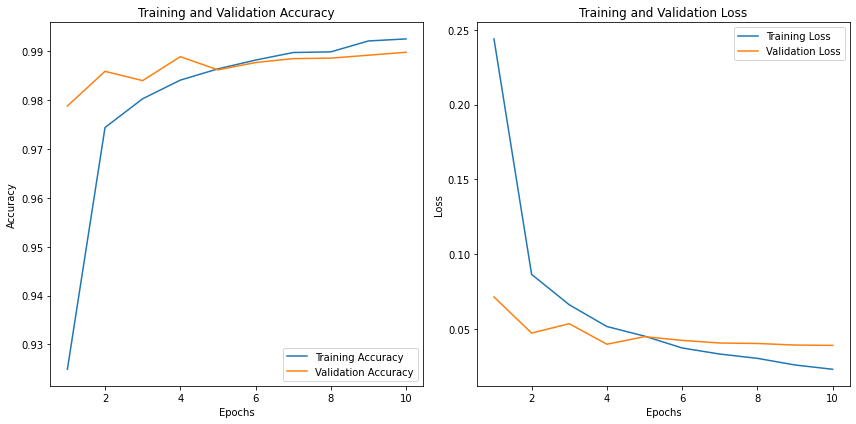

In [15]:
# Récupération des données d'historique de l'entraînement
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(accuracy) + 1)

# Création des graphiques
plt.figure(figsize=(12, 6))

# Graphique de la précision
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Graphique de la perte
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
score = cnn_model_deep.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.0389
Test Accuracy : 0.9898


In [17]:
# Faire des prédictions sur le jeu de test
y_pred_deep = cnn_model_deep.predict(x_test)

# Convertion des prédictions et les étiquettes de test du format one-hot à des entiers
y_pred_classes = np.argmax(y_pred_deep, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Générer le rapport de classification
report = classification_report(y_test_classes, y_pred_classes, target_names=[str(i) for i in range(10)])

# Affichage du rapport de classification
print("Rapport de classification :\n", report)

313/313 [==============================] - 5s 15ms/step
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### 6.2 Changement d'optimiseur :  RMSprop avec un Learning Rate Scheduler

In [18]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Optimiseur RMSprop avec un taux d'apprentissage initial plus petit
optimizer = RMSprop(learning_rate=0.001)

# Réduire le taux d'apprentissage si la validation loss stagne
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# Compilation du modèle
cnn_model_deep.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Entraînement avec le scheduler
history = cnn_model_deep.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), 
                             batch_size=32, callbacks=[lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 83s 43ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.0503 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0520 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0617 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9962
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 0.0619 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0673 - val_accuracy: 0.9907 - lr: 5.0000e-04
Epoch 6/10
1875/1875 [================

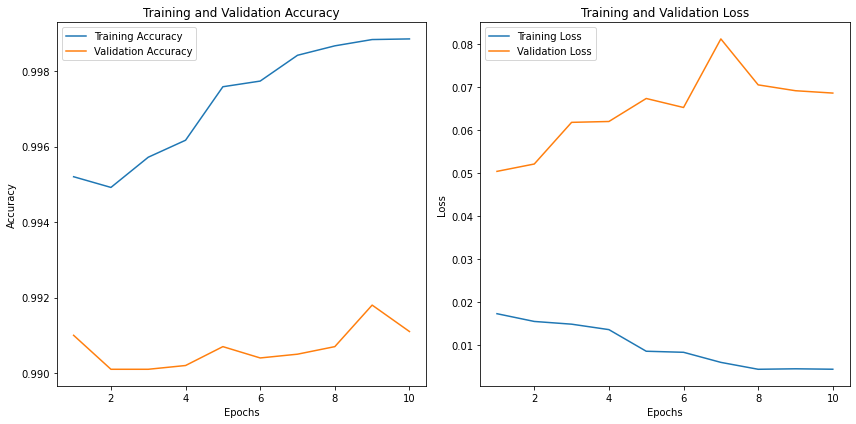

In [20]:
# Récupération des données d'historique de l'entraînement
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(accuracy) + 1)

# Création des graphiques
plt.figure(figsize=(12, 6))

# Graphique de la précision
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Graphique de la perte
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
score = cnn_model_deep.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.0685
Test Accuracy : 0.9911


In [22]:
# Faire des prédictions sur le jeu de test
y_pred_deep = cnn_model_deep.predict(x_test)

# Convertion des prédictions et les étiquettes de test du format one-hot à des entiers
y_pred_classes = np.argmax(y_pred_deep, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Générer le rapport de classification
report = classification_report(y_test_classes, y_pred_classes, target_names=[str(i) for i in range(10)])

# Affichage du rapport de classification
print("Rapport de classification :\n", report)

313/313 [==============================] - 4s 13ms/step
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### 6.3 Utilisation du Batch Normalization

In [23]:
from tensorflow.keras.layers import BatchNormalization

# Modèle CNN avec Batch Normalization
cnn_model_bn = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape),
    BatchNormalization(),  # Ajout de Batch Normalization
    MaxPooling2D(pool_size=2),
    
    Conv2D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),  # Ajout de Batch Normalization
    MaxPooling2D(pool_size=2),
    
    Dropout(0.3),
    Flatten(),
    
    Dense(128, activation='relu'),
    BatchNormalization(),  # Ajout de Batch Normalization
    Dense(10, activation='softmax')
])

In [24]:
# Compilation du modèle
cnn_model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
cnn_model_bn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                      

In [26]:
# Entraînement
history_bn = cnn_model_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 98s 51ms/step - loss: 0.1151 - accuracy: 0.9649 - val_loss: 0.0482 - val_accuracy: 0.9847
Epoch 2/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0353 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0402 - accuracy: 0.9875 - val_loss: 0.0295 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0263 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0263 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0303

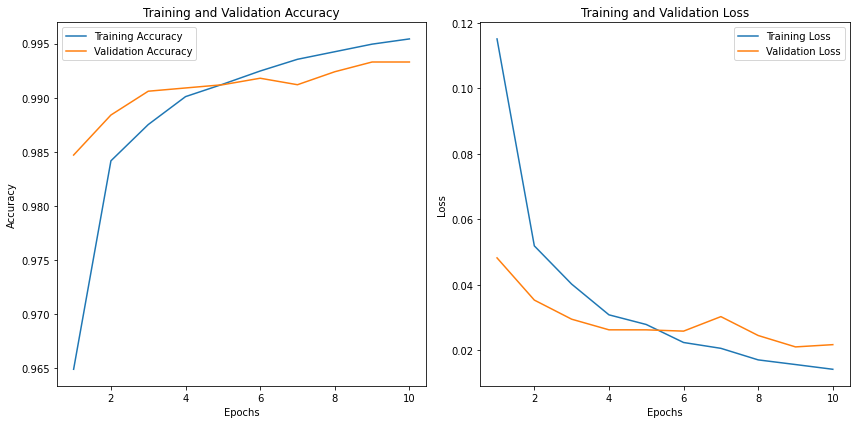

In [27]:
# Récupération des données d'historique de l'entraînement
accuracy = history_bn.history['accuracy']
val_accuracy = history_bn.history['val_accuracy']
loss = history_bn.history['loss']
val_loss = history_bn.history['val_loss']
epochs_range = range(1, len(accuracy) + 1)

# Création des graphiques
plt.figure(figsize=(12, 6))

# Graphique de la précision
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Graphique de la perte
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
score = cnn_model_bn.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.0217
Test Accuracy : 0.9933


In [29]:
# Faire des prédictions sur le jeu de test
y_pred_bn = cnn_model_bn.predict(x_test)

# Convertion des prédictions et les étiquettes de test du format one-hot à des entiers
y_pred_classes = np.argmax(y_pred_bn, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Générer le rapport de classification
report = classification_report(y_test_classes, y_pred_classes, target_names=[str(i) for i in range(10)])

# Affichage du rapport de classification
print("Rapport de classification :\n", report)

313/313 [==============================] - 5s 15ms/step
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



En conclusion, j'ai testé plusieurs techniques  pour améliorer la performance du modèle CNN sur la classification des images. L'augmentation de la profondeur du réseau a permis d'atteindre une précision de 98,98 %. L'optimiseur RMSprop avec un *learning rate scheduler* a amélioré la précision à 99,11 % mais a entrainé un énorme surapprentissage. L'ajout de la normalisation par lot (*Batch Normalization*) a encore amélioré les résultats, obtenant une précision de 99,33 % avec une perte de test réduite. Ces améliorations montrent que la régularisation, l'optimisation avancée et des architectures plus profondes peuvent significativement affiner la performance d'un modèle CNN.